<a href="https://colab.research.google.com/github/beatrice17-hub/Deep_Learning/blob/main/MultiClass_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan Dataset**



In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Give dataset path
mypath = '/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/3scenes'
# CATEGORIES = ["coast", "forest", "highway"] 

In [ ]:
file_name = []
label = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        label.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import pandas as pd

In [ ]:
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":label})
df.groupby(['labels']).size()
# label_group = df.groupby(['labels'])
# labels = list(label_group['labels'])

# print(labels)

labels
coast      360
forest     328
highway    209
dtype: int64

In [ ]:
#cek sample datanya
cek1 = df.head()
print(cek1)

                                                path          file_name labels
0  /content/drive/MyDrive/Colab Notebooks/Deep Le...  coast_cdmc934.jpg  coast
1  /content/drive/MyDrive/Colab Notebooks/Deep Le...  coast_cdmc940.jpg  coast
2  /content/drive/MyDrive/Colab Notebooks/Deep Le...   coast_nat810.jpg  coast
3  /content/drive/MyDrive/Colab Notebooks/Deep Le...    coast_sun16.jpg  coast
4  /content/drive/MyDrive/Colab Notebooks/Deep Le...    coast_bea26.jpg  coast


In [ ]:
print(label)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [ ]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [ ]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['labels']

**Note:**

**1. The training set** is a subset of the data set used to train a model.

**- x_train** is the training data set.

**- y_train** is the set of labels to all the data in x_train.

**2. The test set** is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

**- x_test** is the test data set.

**- y_test** is the set of labels to all the data in x_test.

**3. The validation set** is a subset of the data set (separate from the training set) that you use to adjust hyperparameters.

In [ ]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [ ]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [ ]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'label':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'label':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'label':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_tr))
print('val size', len(df_val))
print('test size', len(df_te))

train size 717
val size 90
test size 90


In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','label']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
cek2 = df_all.sample(10)
print(cek2)


set         label  
test        coast       37
            forest      32
            highway     21
train       coast      294
            forest     263
            highway    160
validation  coast       29
            forest      33
            highway     28
dtype: int64 


                                                  path    label         set
474  /content/drive/MyDrive/Colab Notebooks/Deep Le...   forest       train
690  /content/drive/MyDrive/Colab Notebooks/Deep Le...    coast       train
638  /content/drive/MyDrive/Colab Notebooks/Deep Le...  highway       train
593  /content/drive/MyDrive/Colab Notebooks/Deep Le...   forest       train
846  /content/drive/MyDrive/Colab Notebooks/Deep Le...   forest  validation
462  /content/drive/MyDrive/Colab Notebooks/Deep Le...    coast       train
399  /content/drive/MyDrive/Colab Notebooks/Deep Le...  highway       train
854  /content/drive/MyDrive/Colab Notebooks/Deep Le...   forest  validation
861  /content/drive/MyDrive/Colab No

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
datasource_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/3scenes'
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/dataset'

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['label'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['label'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['label']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['label'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Persiapan Training**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# Parameter input untuk network
dim = (256,256)
channel = (3, )
input_shape = dim + channel
# Batch size
batch_size = 32
# Epoch
epoch = 10

 **Note:**
***input_shape***: Optional shape tuple, to be specified if you would like to use a model with an input image resolution that is not (224, 224, 3). It should have exactly 3 inputs channels (224, 224, 3). You can also omit this option if you would like to infer input_shape from an input_tensor. If you choose to include both input_tensor and input_shape then input_shape will be used if they match, if the shapes do not match then we will throw an error. E.g. (160, 160, 3) would be one valid value.

In [ ]:
# Mempersiapkan dataset pipeline dan augmentation Untuk proses pembuatan dataset
  # Dataset pipeline merupakan perintah untuk melakukan ekstraksi data yang berupa images/citra digital, 
  # yang berasal dari sebuah folder menjadi sebuah array yang dapat dibaca oleh tensorflow

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# Membuat flow datanya

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/dataset/train/',
                                                    target_size=(256,256,),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/dataset/validation/',
                                                target_size=(256,256,),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/dataset/test/',
                                                  target_size=(256,256,),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = test_generator.num_classes

Found 717 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [ ]:
# Transformasi data generator menjadi tf.data

def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator
train_data = tf_data_generator(train_generator, input_shape)
test_data = tf_data_generator(test_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

# **Membuat Struktur Convolutional Neural Network**

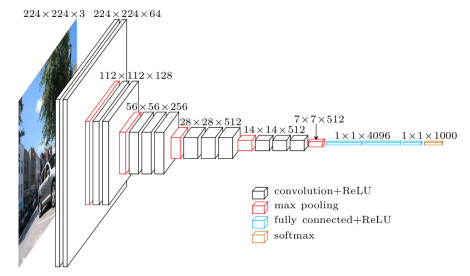

In [ ]:
vgg16_model = tf.keras.applications.VGG16(input_shape=(256, 256, 3), include_top=False, weights="imagenet")

for layer in vgg16_model.layers:
  layer.trainable = False

last_output = vgg16_model.layers[-1].output
vgg_x = tf.keras.layers.Flatten()(last_output)
vgg_x = tf.keras.layers.Dense(4096, activation = 'relu')(vgg_x)
vgg_x = tf.keras.layers.Dense(4096, activation = 'relu')(vgg_x)
vgg_x = tf.keras.layers.Dense(3, activation = 'softmax')(vgg_x)
model = tf.keras.Model(vgg16_model.input, vgg_x)


In [ ]:
# Cara Tradisional

# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.load_weights('vggweights.h5')
# for layer in model.layers:
#   layer.trainable=False

# model.add(Flatten())
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=3, activation="softmax"))

# model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# Compile Model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

# **Proses Training Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

# ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. n this case I am monitoring validation accuracy
# by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater 
# than what it was in the last epoch.

In [ ]:
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

# EarlyStopping helps us to stop the training of the model early if there is no increase in 
# the parameter which I have set to monitor in EarlyStopping. In this case I am monitoring 
# validation accuracy by passing val_acc to EarlyStopping. I have here set patience to 20 which means that the model will stop to train if it doesn’t see any rise in validation accuracy in 20 epochs.

In [ ]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=val_data,
        validation_steps=len(val_generator),
        shuffle=True,
        # callbacks=[checkpoint, early], 
        verbose = 1)

Epoch 1/10
23/23 [==============================] - 23s 967ms/step - loss: 7.8904 - accuracy: 0.6974 - val_loss: 0.2269 - val_accuracy: 0.9222
Epoch 2/10
23/23 [==============================] - 22s 952ms/step - loss: 0.1672 - accuracy: 0.9554 - val_loss: 0.0287 - val_accuracy: 0.9889
Epoch 3/10
23/23 [==============================] - 22s 955ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9667
Epoch 4/10
23/23 [==============================] - 22s 953ms/step - loss: 0.0296 - accuracy: 0.9916 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 5/10
23/23 [==============================] - 22s 954ms/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 0.0702 - val_accuracy: 0.9556
Epoch 6/10
23/23 [==============================] - 22s 955ms/step - loss: 0.0260 - accuracy: 0.9930 - val_loss: 0.0399 - val_accuracy: 0.9778
Epoch 7/10
23/23 [==============================] - 22s 951ms/step - loss: 0.0508 - accuracy: 0.9861 - val_loss: 0.1202 - val_accuracy: 0.9667

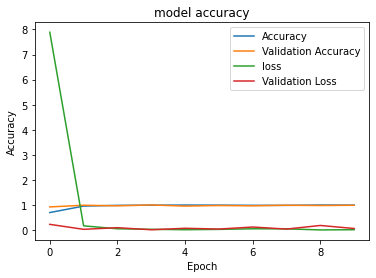

In [ ]:
# visualise training/validation accuracy and loss using matplotlib

import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_true = test_generator.classes
y_pred = model.predict(test_generator)
rounded_pred = np.argmax(y_pred,axis=1)
cm = metrics.confusion_matrix(y_true, rounded_pred)
print(cm)
report = classification_report(y_true, rounded_pred)
print(report)

[[17 14  6]
 [15 11  6]
 [ 8  5  8]]
              precision    recall  f1-score   support

           0       0.42      0.46      0.44        37
           1       0.37      0.34      0.35        32
           2       0.40      0.38      0.39        21

    accuracy                           0.40        90
   macro avg       0.40      0.39      0.40        90
weighted avg       0.40      0.40      0.40        90



In [ ]:
# Evaluasi model menggunakan data testing

loss, acc = model.evaluate(train_data,steps=len(train_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_data,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')

Accuracy on training data: 0.9847 
Loss on training data: 0.0411 

Accuracy on test data: 1.0000 
Loss on test data: 0.0113 



# **Simpan Model yang Sudah di Training**

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "classification"
SAVE_MODEL_NAME = "modelvgg.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At model/classification/modelvgg.h5...


# **Membuat Fungsi Prediksi**

In [ ]:
# definisi variabel global

import requests
from io import BytesIO
from PIL import Image
import numpy as np
# Parameters
input_size = (256,256)
#define input shape
channel = (3,)
input_shape = input_size + channel
#define labels
labels = ['coast', 'forest', 'highway']

In [ ]:
# mendefinisikan fungsi pre-process, dimana fungsi ini adalah mengubah sebuah citra menjadi sebuah array yang cocok 
# untuk masuk kedalam model yang sudah kita latih.

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
# load model yang sudah di training

from tensorflow.keras.models import load_model
MODEL_PATH = 'model/classification/modelvgg.h5'
model = load_model(MODEL_PATH,compile=False)

# **Mencoba Prediksi**

In [ ]:
#1 read image hutan_biru.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/Copy of hutan_biru.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)


[[0.39890012 0.5672757  0.03382419]]
forest 0.5672757


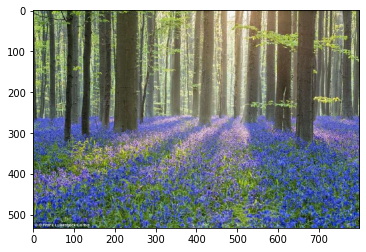

In [ ]:
img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

In [ ]:
#2 read image pantai.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/Copy of pantai.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

[[1.0000000e+00 2.4312269e-10 5.8832046e-09]]
coast 1.0


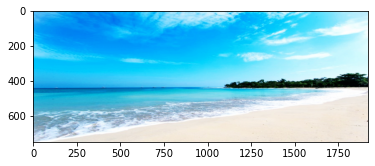

In [ ]:
img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

In [ ]:
#3 read image hutan.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/Copy of hutan.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

[[1.2949668e-09 1.0000000e+00 1.4090437e-14]]
forest 1.0


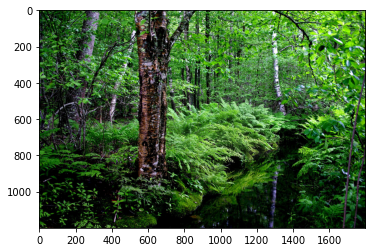

In [ ]:
img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

In [ ]:
#4 read image highway.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/highway.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

[[9.9993753e-01 3.0583117e-06 5.9349288e-05]]
coast 0.99993753


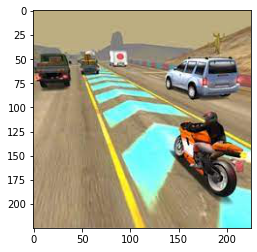

In [ ]:
img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

[[9.975591e-01 2.438037e-03 2.844644e-06]]
coast 0.9975591


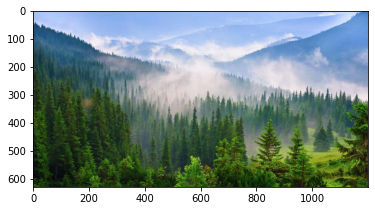

In [ ]:
#5 read image forest_test.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/forest_test.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

[[4.7050357e-02 9.5294952e-01 6.4761316e-08]]
forest 0.9529495


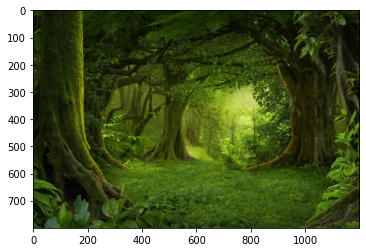

In [ ]:
#6 read image forest_test.jpg

im = Image.open('/content/drive/MyDrive/Colab Notebooks/Deep Learning - Image Classification/forest-web.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

img = np.asarray(im)
plt.imshow(img)

print(y)
print( labels[np.argmax(y)], np.max(y) )

Source:
<br> 
[1] https://medium.com/@hafizhan.aliady/membuat-klasifikasi-gambar-images-menggunakan-keras-tensorflow-tf-keras-dan-python-53f7ae953cea
<br>
[2]https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
<br>
[3]https://www.youtube.com/watch?v=bEsRLXY7GCo